In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('orange_or_grape')

In [4]:
df.head()

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      10000 non-null  object 
 1   diameter  10000 non-null  float64
 2   weight    10000 non-null  float64
 3   red       10000 non-null  int64  
 4   green     10000 non-null  int64  
 5   blue      10000 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB


In [6]:
df.describe()

,diameter,weight,red,green,blue
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9.975685,175.050792,153.847800,76.010600,11.363200
std,1.947844,29.212119,10.432954,11.708433,9.061275
min,2.960000,86.760000,115.000000,31.000000,2.000000
25%,8.460000,152.220000,147.000000,68.000000,2.000000
50%,9.980000,174.985000,154.000000,76.000000,10.000000
75%,11.480000,197.722500,161.000000,84.000000,17.000000
max,16.450000,261.510000,192.000000,116.000000,56.000000


In [7]:
df['name'].value_counts()

orange        5000
grapefruit    5000
Name: name, dtype: int64

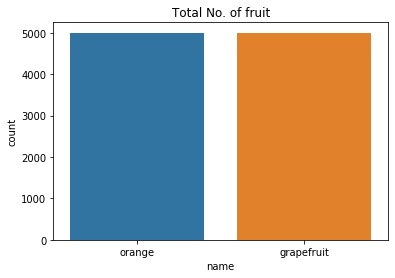

In [15]:
sns.countplot(df['name'])
plt.title('Total No. of fruit')
plt.show()

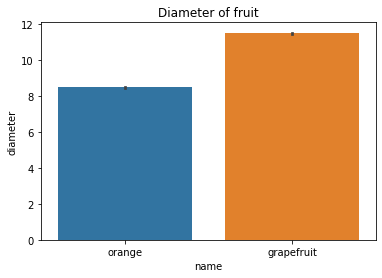

In [14]:
sns.barplot(x='name',y='diameter',data=df)
plt.title('Diameter of fruit')
plt.show()

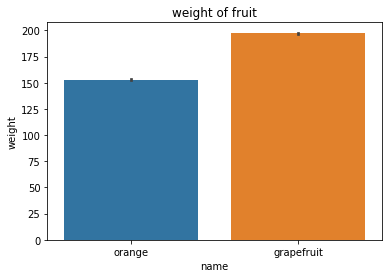

In [16]:
sns.barplot(x='name',y='weight',data=df)
plt.title('weight of fruit')
plt.show()

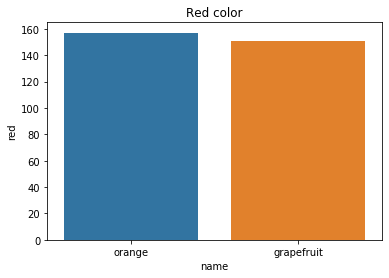

In [20]:
sns.barplot(x='name',y='red',data=df)
plt.title('Red color')
plt.show()

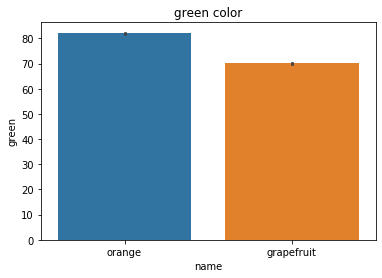

In [21]:
sns.barplot(x='name',y='green',data=df)
plt.title('green color')
plt.show()

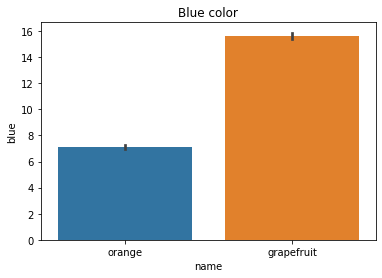

In [22]:
sns.barplot(x='name',y='blue',data=df)
plt.title('Blue color')
plt.show()

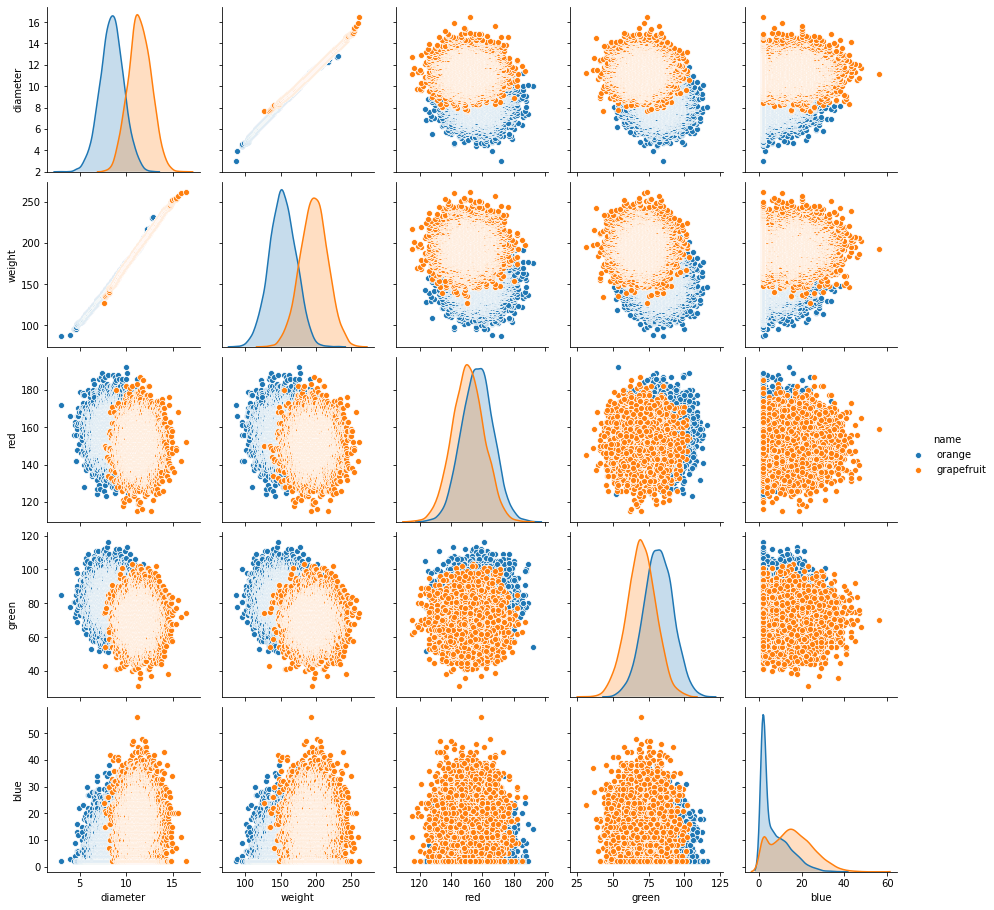

In [24]:
sns.pairplot(df,hue='name')

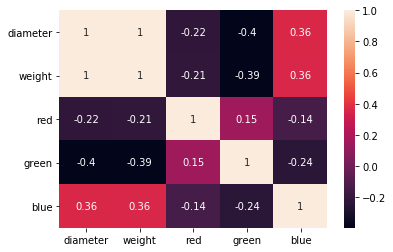

In [26]:
sns.heatmap(df.corr(),annot=True)

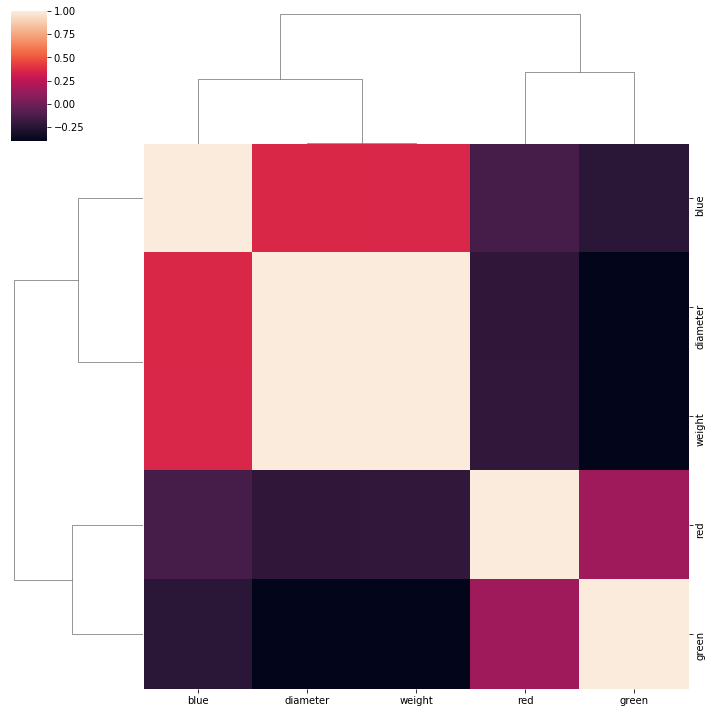

In [28]:
sns.clustermap(df.corr())

In [29]:
df.head(2)

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3


In [30]:
def change(name):
    if name=='orange':
        return 1
    else:
        return 0

In [32]:
df['orange'] = df['name'].apply(change)

In [33]:
df.head()

,name,diameter,weight,red,green,blue,orange
0,orange,2.96,86.76,172,85,2,1
1,orange,3.91,88.05,166,78,3,1
2,orange,4.42,95.17,156,81,2,1
3,orange,4.47,95.60,163,81,4,1
4,orange,4.48,95.76,161,72,9,1


In [35]:
df.drop('name',axis=1,inplace=True)

# Train-test-split

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('orange',axis=1),df['orange'], test_size=0.33, random_state=101)

# KNN

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
knn_predict = knn.predict(X_test)

print(classification_report(y_test,knn_predict))
print()
print(confusion_matrix(y_test,knn_predict))
print()
print(f'Accuracy -> {accuracy_score(y_test,knn_predict)}')

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1635
           1       0.92      0.92      0.92      1665

    accuracy                           0.92      3300
   macro avg       0.92      0.92      0.92      3300
weighted avg       0.92      0.92      0.92      3300


[[1507  128]
 [ 139 1526]]

Accuracy -> 0.9190909090909091


# Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()
lg.fit(X_train,y_train)
lg_predict = lg.predict(X_test)

print(classification_report(y_test,lg_predict))
print()
print(confusion_matrix(y_test,lg_predict))
print()
print(f'Accuracy -> {accuracy_score(y_test,lg_predict)}')

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1635
           1       0.97      0.95      0.96      1665

    accuracy                           0.96      3300
   macro avg       0.96      0.96      0.96      3300
weighted avg       0.96      0.96      0.96      3300


[[1586   49]
 [  86 1579]]

Accuracy -> 0.9590909090909091


 # Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf_predict = rf.predict(X_test)

print(classification_report(y_test,rf_predict))
print()
print(confusion_matrix(y_test,rf_predict))
print()
print(f'Accuracy -> {accuracy_score(y_test,rf_predict)}')

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      1635
           1       0.95      0.94      0.95      1665

    accuracy                           0.95      3300
   macro avg       0.95      0.95      0.95      3300
weighted avg       0.95      0.95      0.95      3300


[[1560   75]
 [  93 1572]]

Accuracy -> 0.9490909090909091


# Therefore, Logistic Regression Model preform Best